In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [2]:
merged_dir = "../../../data/merged"
image_dir = "../../../images/DT"
train_file_path = os.path.join(merged_dir, "train_kmeanssmote.parquet")
train_data = pd.read_parquet(train_file_path)
test_file_path = os.path.join(merged_dir, "test_data.parquet")
test_data = pd.read_parquet(test_file_path)

In [3]:
# Prepare features and labels
X_train = train_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_train = train_data['fire'].to_numpy()

X_test = test_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_test = test_data['fire'].to_numpy()

In [4]:
import sys
from pathlib import Path

# Add the folders where the .py files live
sys.path.append(str(Path('../../../code/myModels').resolve()))
sys.path.append(str(Path('../../../code/Metrics').resolve()))

# Now import
from DecisionTree import MyDecisionTree
from classification import ClassificationMetrics, evaluate_predictions


In [5]:
# free up memory

import gc
gc.collect()

0

In [6]:
tree = MyDecisionTree(max_depth=15, min_samples_split=100, n_bins=100, chunk_size=10000)
tree.fit(X_train, y_train)


Starting tree training with 20000 samples...
[Depth 0] Processing root node with 20000 samples
Evaluating 58 features...


-> Split node #1: X[14] <= 1.6547 (IG=0.2987)
  [Depth 1] 11886 samples, 2 classes
  Evaluating 58 features...
  -> Split node #2: X[25] <= -0.7300 (IG=0.1114)
    [Depth 2] 728 samples, 2 classes
    Evaluating 58 features...
    -> Split node #3: X[0] <= -0.4801 (IG=0.0646)
      [Depth 3] 710 samples, 2 classes
      Evaluating 58 features...
      -> Split node #4: X[14] <= -0.5081 (IG=0.0270)
        [Depth 4] 702 samples, 2 classes
        Evaluating 58 features...
        -> Split node #5: X[26] <= -0.3935 (IG=0.0189)
          [Depth 5] 580 samples, 2 classes
          Evaluating 58 features...
          -> Split node #6: X[42] <= 0.0000 (IG=0.0248)
            [Depth 6] 578 samples, 2 classes
            Evaluating 58 features...
            -> Split node #7: X[11] <= -0.7371 (IG=0.0080)
              [Depth 7] 530 samples, 2 classes
              Evaluating 58 features...
              -> Split node #8: X[0] <= -0.5080 (IG=0.0032)
                [Depth 8] 166 samples, 2 clas

In [7]:
y_pred = tree.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

y_true = y_test

# 1️⃣ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = np.unique(np.concatenate([y_true, y_pred]))

# Pretty-print confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=labels, columns=labels))

# 2️⃣ Classification report (precision, recall, f1-score)
report = classification_report(y_true, y_pred, digits=3)
print("\nClassification Report:")
print(report)



Confusion Matrix:
      0    1
0  6796  780
1   213  670

Classification Report:
              precision    recall  f1-score   support

           0      0.970     0.897     0.932      7576
           1      0.462     0.759     0.574       883

    accuracy                          0.883      8459
   macro avg      0.716     0.828     0.753      8459
weighted avg      0.917     0.883     0.895      8459



[Text(0.5256166982922201, 0.9375, 'X14 <= 1.655'),
 Text(0.03225806451612903, 0.875, 'X25 <= -0.730'),
 Text(0.028462998102466792, 0.8125, 'X0 <= -0.480'),
 Text(0.024667931688804556, 0.75, 'X14 <= -0.508'),
 Text(0.017077798861480076, 0.6875, 'X26 <= -0.394'),
 Text(0.013282732447817837, 0.625, 'X42 <= 0.000'),
 Text(0.009487666034155597, 0.5625, 'X11 <= -0.737'),
 Text(0.0056925996204933585, 0.5, 'X0 <= -0.508'),
 Text(0.0018975332068311196, 0.4375, 'X0 <= -0.511'),
 Text(0.0, 0.375, 'class = 1'),
 Text(0.003795066413662239, 0.375, 'class = 1'),
 Text(0.007590132827324478, 0.4375, 'class = 1'),
 Text(0.011385199240986717, 0.5, 'class = 1'),
 Text(0.015180265654648957, 0.5625, 'class = 0'),
 Text(0.020872865275142316, 0.625, 'X33 <= -1.000'),
 Text(0.018975332068311195, 0.5625, 'class = 1'),
 Text(0.022770398481973434, 0.5625, 'class = 1'),
 Text(0.026565464895635674, 0.6875, 'class = 0'),
 Text(0.030360531309297913, 0.75, 'class = 0'),
 Text(0.11195445920303605, 0.8125, 'X32 <= -1.66

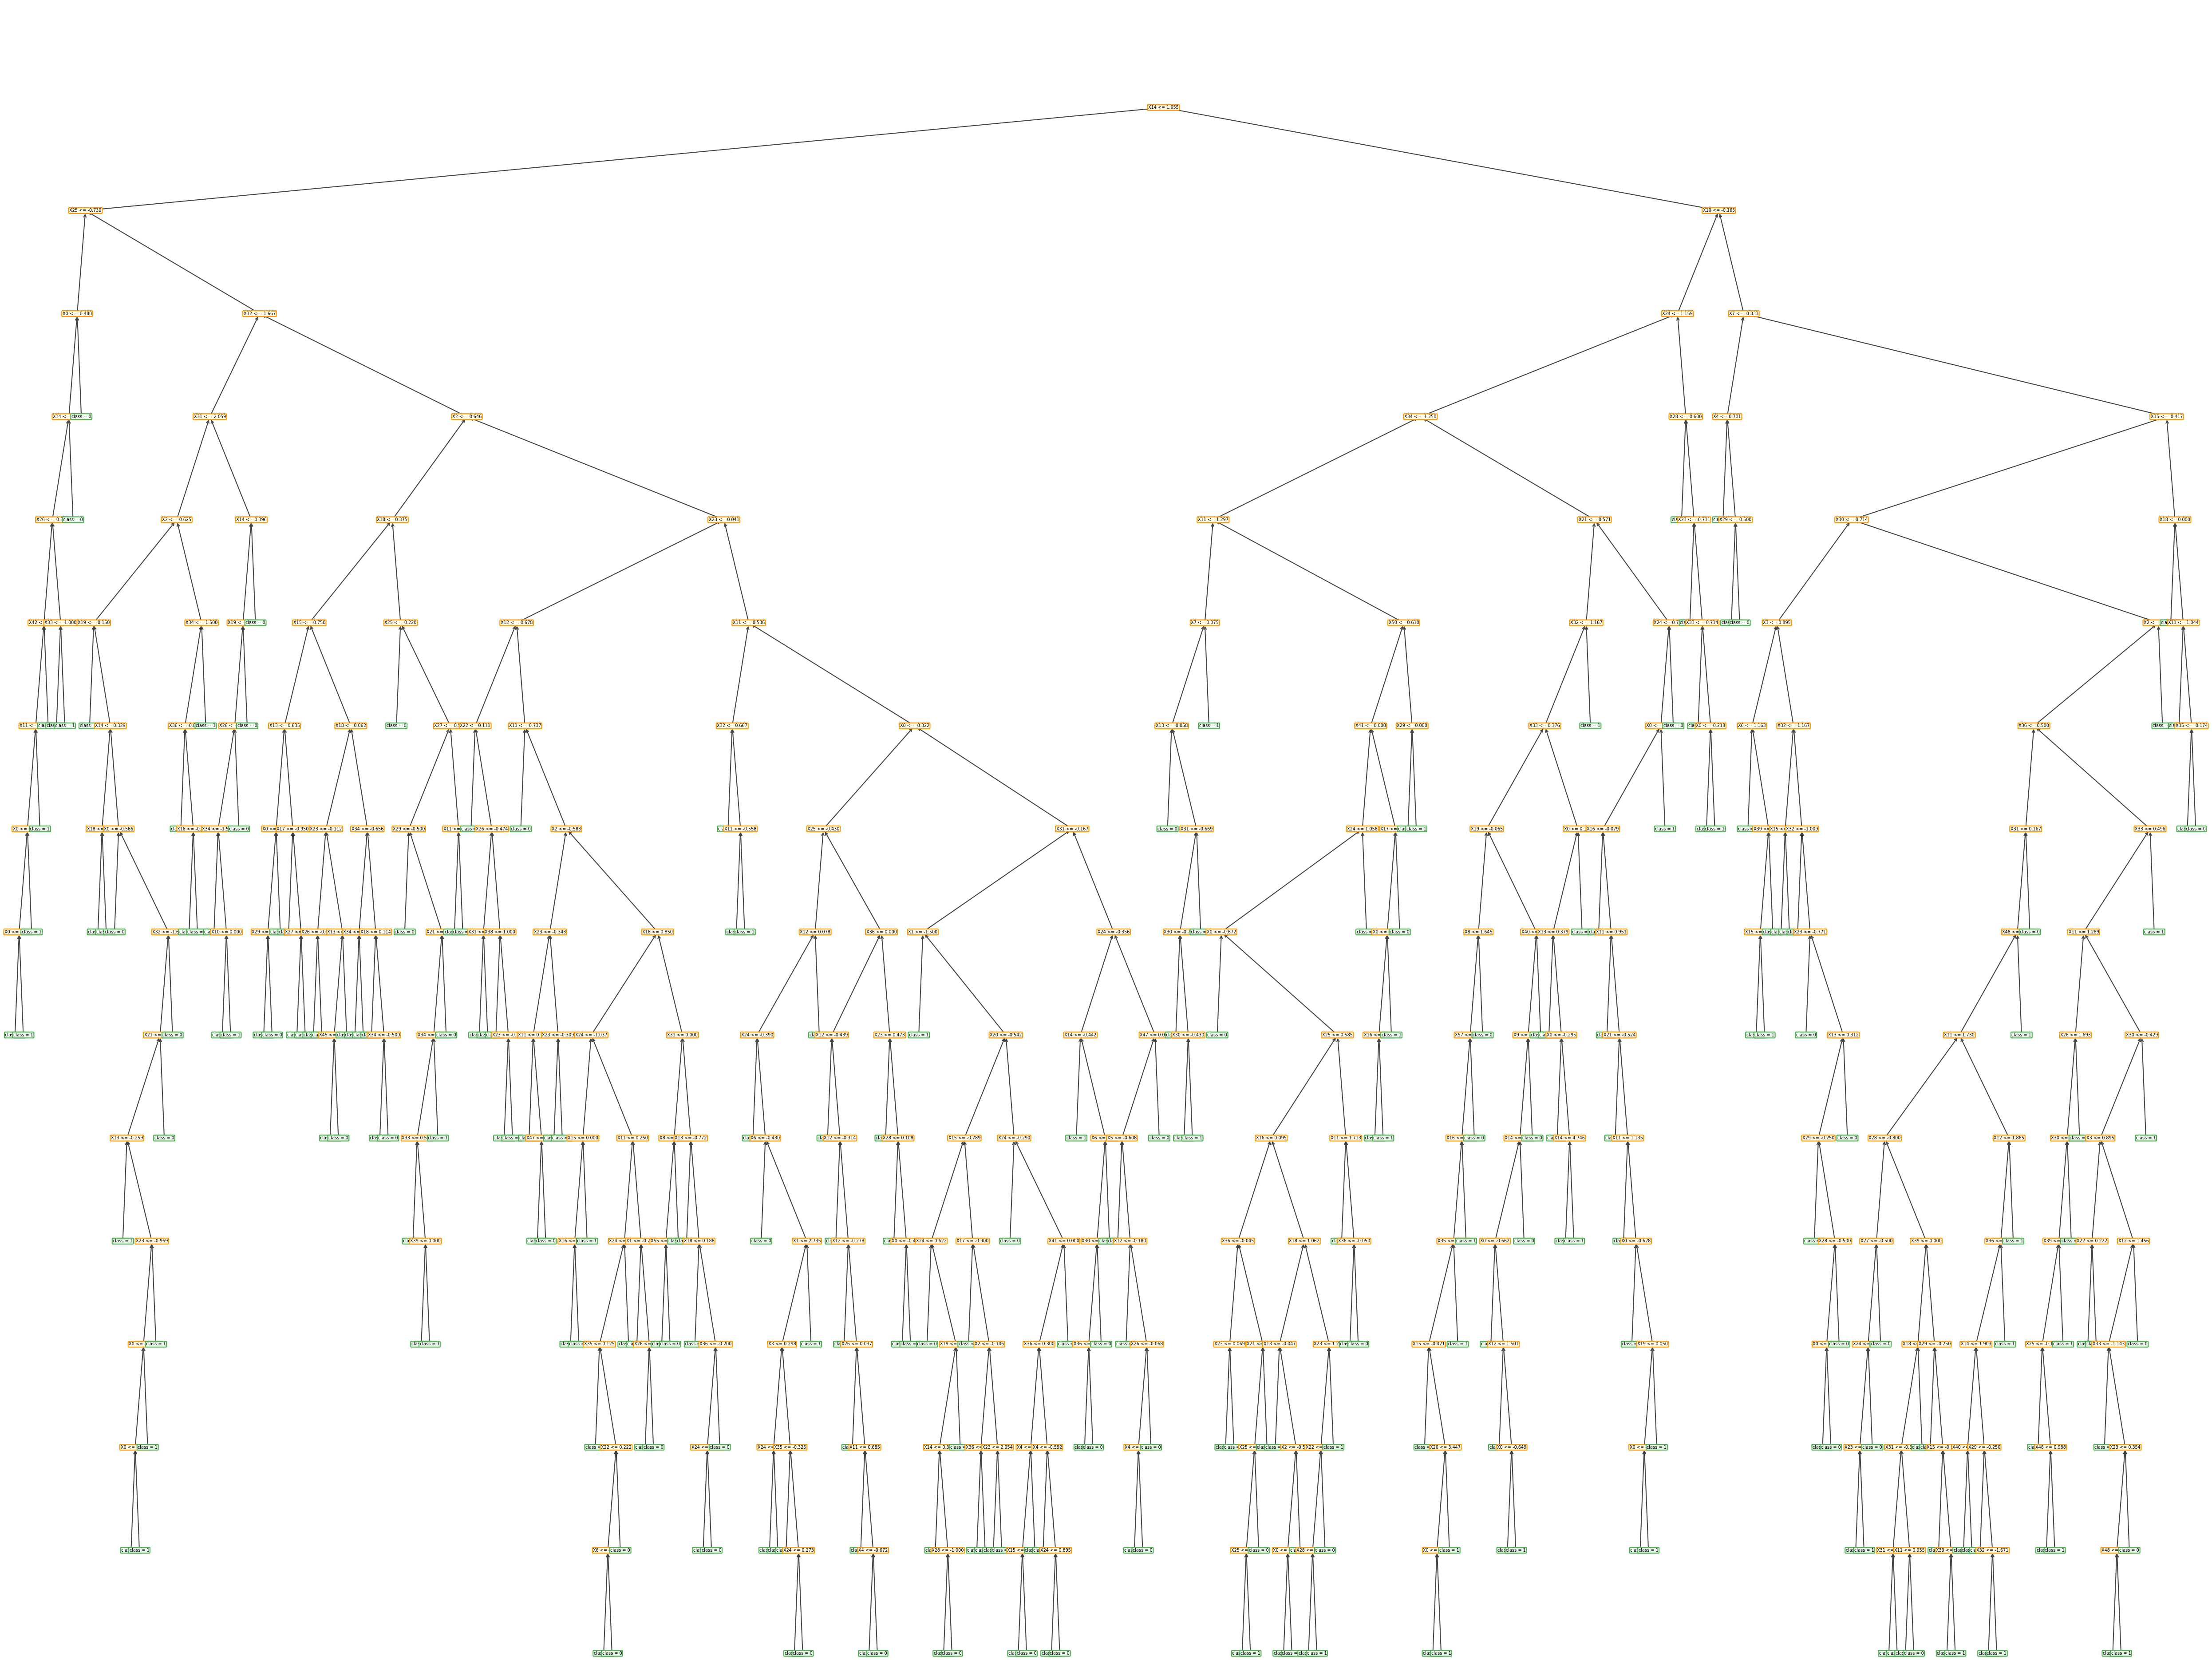

In [9]:
# Plot the tree
n_features = X_train.shape[1]
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"X{i}" for i in range(n_features)]
tree.plot(feature_names=feature_names)  # Shows full tree now!

In [10]:
# Show feature importances
print("\nFeature Importances:")
importances = tree.feature_importances()
for feat_idx, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
    print(f"  X{feat_idx}: {importance:.4f}")


Feature Importances:
  X14: 0.2066
  X25: 0.0926
  X10: 0.0862
  X0: 0.0589
  X32: 0.0555
  X24: 0.0512
  X7: 0.0481
  X2: 0.0388
  X11: 0.0319
  X34: 0.0307
  X31: 0.0264
  X18: 0.0263
  X23: 0.0253
  X35: 0.0242
  X28: 0.0218
  X4: 0.0215
  X26: 0.0159
  X29: 0.0156
  X33: 0.0149
  X30: 0.0123
  X19: 0.0121
  X21: 0.0121
  X15: 0.0078
  X13: 0.0074
  X12: 0.0070
  X36: 0.0064
  X3: 0.0056
  X42: 0.0053
  X50: 0.0053
  X16: 0.0041
  X27: 0.0034
  X6: 0.0030
  X22: 0.0028
  X17: 0.0028
  X41: 0.0028
  X39: 0.0016
  X1: 0.0008
  X8: 0.0008
  X48: 0.0007
  X40: 0.0007
  X38: 0.0007
  X47: 0.0005
  X45: 0.0003
  X20: 0.0003
  X57: 0.0003
  X9: 0.0003
  X5: 0.0002
  X55: 0.0001


In [11]:
# map feature importances to feature names
feature_names = train_data.drop(columns=['fire', 'longitude', 'latitude']).columns if hasattr(train_data, 'columns') else [f"X{i}" for i in range(n_features)]
importance_dict = {feature_names[feat_idx]: importance for feat_idx, importance in importances.items()}
# print with feature names
print("\nFeature Importances with Names:")
for feat_name, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feat_name}: {importance:.4f}")


Feature Importances with Names:
  prec_median_winter: 0.2066
  prec_iqr_summer: 0.0926
  GYPSUM: 0.0862
  elevation: 0.0589
  tmax_iqr_spring: 0.0555
  prec_iqr_spring: 0.0512
  CN_RATIO: 0.0481
  SAND: 0.0388
  prec_median_autumn: 0.0319
  tmax_iqr_winter: 0.0307
  tmax_iqr_autumn: 0.0264
  tmin_median_winter: 0.0263
  prec_iqr_autumn: 0.0253
  tmax_max: 0.0242
  tmin_iqr_spring: 0.0218
  TCARBON_EQ: 0.0215
  prec_iqr_winter: 0.0159
  tmin_iqr_summer: 0.0156
  tmax_iqr_summer: 0.0149
  tmin_iqr_winter: 0.0123
  tmax_median_autumn: 0.0121
  tmax_median_summer: 0.0121
  tmin_median_autumn: 0.0078
  prec_median_summer: 0.0074
  prec_median_spring: 0.0070
  prec_min: 0.0064
  CLAY: 0.0056
  LCCCode_0011: 0.0053
  LCCCode_21497-121340: 0.0053
  tmin_median_spring: 0.0041
  tmin_iqr_autumn: 0.0034
  TOTAL_N: 0.0030
  tmax_median_winter: 0.0028
  tmin_median_summer: 0.0028
  LCCCode_0010: 0.0028
  LCCCode_0003 / 0004: 0.0016
  COARSE: 0.0008
  CEC_SOIL: 0.0008
  LCCCode_21450: 0.0007
  LCCC

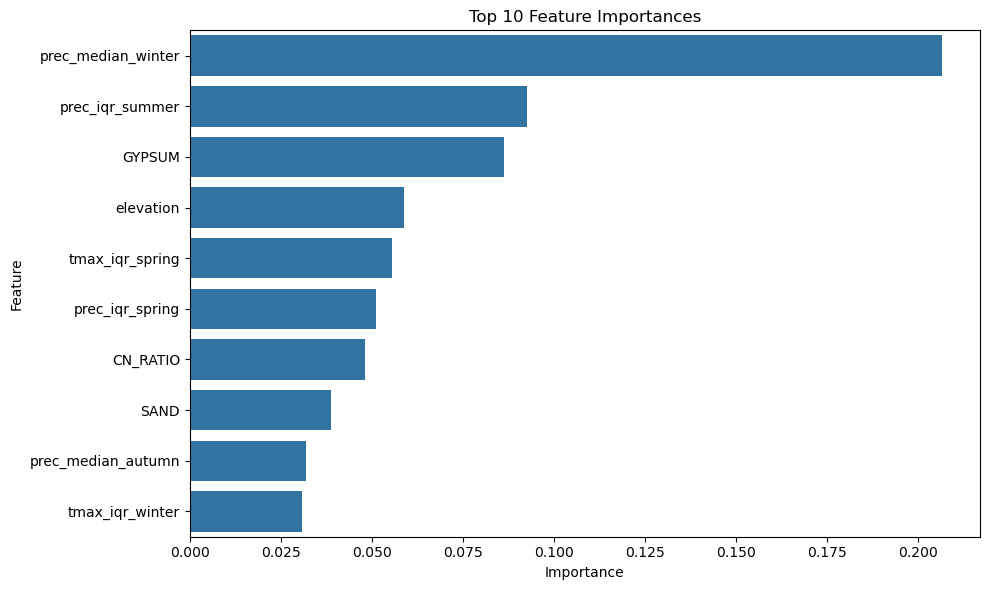

In [12]:
# Plot top 10 feature importances with their names
top_n = 10
top_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
feat_names, feat_importances = zip(*top_features)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(feat_importances), y=list(feat_names))
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
savepath = os.path.join(image_dir, "decision_tree_kmeanssmote_feature_importances.png")
plt.savefig(savepath)
plt.show()


In [13]:
# save predictions, y_pred with their true labels and the model
import pickle
output_dir = "../../models/decision_tree"
os.makedirs(output_dir, exist_ok=True)
with open(os.path.join(output_dir, "y_test_kmeanssmote.pkl"), "wb") as f:
    pickle.dump(y_test, f)
with open(os.path.join(output_dir, "y_pred_kmeanssmote.pkl"), "wb") as f:
    pickle.dump(y_pred, f)
with open(os.path.join(output_dir, "decision_tree_model_kmeanssmote.pkl"), "wb") as f:
    pickle.dump(tree, f)
